## Gráfico de Líneas Dobles

Es un gráfico de líneas al cual quiero añadirle una línea adicional que codifique los valores de una nueva varible utilizando un segundo Eje Y con una escala diferente.

**Eje X**: Variable numérica o variable categórica ordinal (tiempo)

**Eje Y de la izquierda**: Variable numérica.

**Eje Y de la derecha**: Variable numérica.

**Otros nombres**: Twin plot

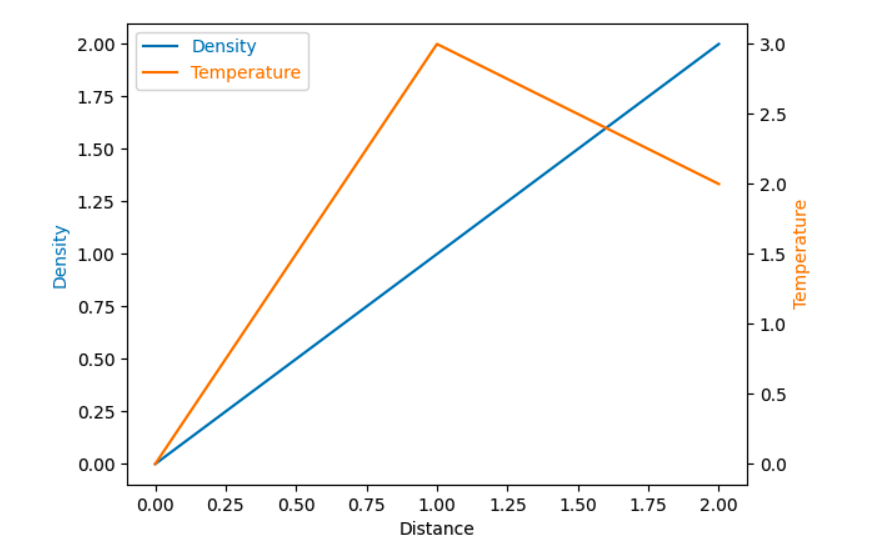

### Cuándo utilizar
- Cuando quiero comparar como se relacionan los cambios de magnitud de más de una varible (Ejes Y), regidos por otra variable (Eje X). Es decir, me interesa como interactuan las 3 variables.

### Cuándo NO utilizar
- Si no me interesa conocer la interacción de las 3 variables.

### Consejos
- Puedo añadir cuantos Ejes Y quiera. Sin embargo, esto aumenta la complejidad del gráfico y eventualmente se vuelve incomprensible.
    - Es indispensable que cada Eje Y tenga su propio color de acuerdo a la línea.
- Es una alternativa  más efectiva al Gráfico de Radar. Ya que tengo diferentes escalas, sin comprometer la habilidad de comparar facilmente las variables entre sí.

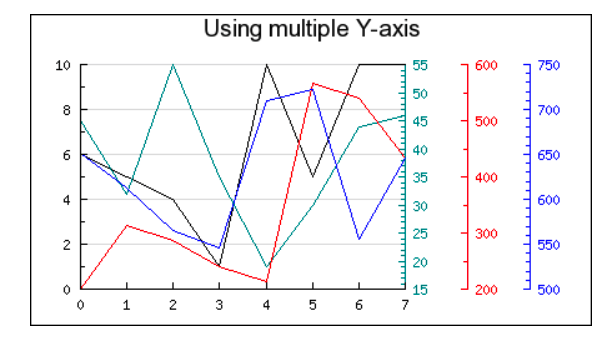

### En esta clase

#### Datos
Información sobre países por año: Expectativa de vida, Población y GDP per Cápita

### Objetivos
1. Analizar cómo cambia la expectativa de vida y el GDP per Cápita a través de los años en Asia.

### Referencias
- https://github.com/lkuffo/data-viz/blob/main/NIVEL2/7_lineas_doble.ipynb



In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../data/paises_vida.csv', index_col='index')
df = df.dropna()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716


In [5]:
df_asia = df[df['continent'] == 'Asia']
df_asia

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
index,,,,,,,,
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538,YEM,887
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673,YEM,887
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526,YEM,887


In [7]:
df_asia_agrupado = df_asia.groupby('year').agg({
    'lifeExp': 'mean',
    'gdpPercap': 'mean'
})
df_asia_agrupado

,lifeExp,gdpPercap
year,,
1952,46.314394,5195.484004
1957,49.318544,5787.732940
1962,51.563223,5729.369625
1967,54.663640,5971.173374
1972,57.319269,8187.468699
1977,59.610556,7791.314020
1982,62.617939,7434.135157
1987,64.851182,7608.226508
1992,66.537212,8639.690248


<Axes: xlabel='year'>

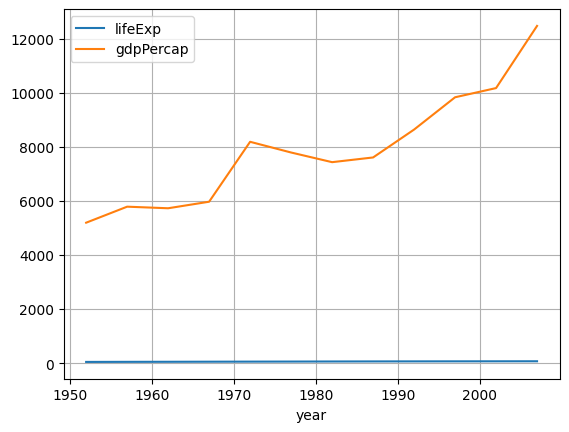

In [8]:
df_asia_agrupado.plot.line(
    y=['lifeExp', 'gdpPercap'],
    grid=True
)

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Relación entre el PIB per Cápita y Expectativa de Vida en Asia')

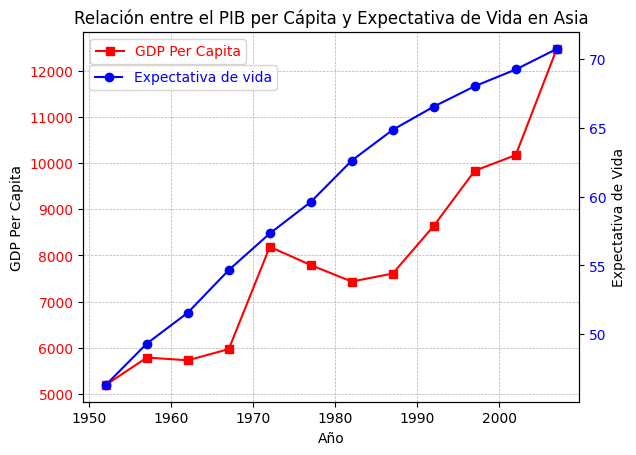

In [40]:
fig, ax1 = plt.subplots()

ax1.plot(
    df_asia_agrupado.index.values,
    df_asia_agrupado['gdpPercap'],
    color='red',
    marker='s'
)

# Agregar grid al eje principal
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)

ax1.set_ylabel('GDP Per Capita')
ax1.set_xlabel('Año')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()

ax2.plot(
    df_asia_agrupado.index.values,
    df_asia_agrupado['lifeExp'],
    color='blue',
    marker='o'
)

ax2.set_ylabel('Expectativa de Vida')
ax2.tick_params(axis='y', labelcolor='blue')

ax1.legend(
    title='',
    labels=['GDP Per Capita'],
    labelcolor=['red']
)

ax2.legend(
    bbox_to_anchor=(0.405, 0.93),
    title='',
    labels=['Expectativa de vida'],
    labelcolor=['blue']
)

plt.title('Relación entre el PIB per Cápita y Expectativa de Vida en Asia')
